In [2]:
import pandas as pd
import numpy as np
from math import log2
from sklearn.preprocessing import LabelEncoder

# Đọc file (đặt đúng đường dẫn nếu ở local)
df = pd.read_csv("train.csv")

# Chọn vài cột cần thiết và xử lý dữ liệu
df = df[['Survived', 'Pclass', 'Sex', 'Age']]
df.dropna(inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Hàm tính Entropy
def entropy(y):
    counts = np.bincount(y)
    probs = counts / len(y)
    return -np.sum([p * log2(p) for p in probs if p > 0])

# Hàm tính Gini
def gini(y):
    counts = np.bincount(y)
    probs = counts / len(y)
    return 1 - np.sum([p**2 for p in probs])

# Chia tập theo ngưỡng tuổi (ví dụ: 30)
threshold = 30
left = df[df['Age'] <= threshold]['Survived']
right = df[df['Age'] > threshold]['Survived']

# Tính toán
parent_entropy = entropy(df['Survived'])
parent_gini = gini(df['Survived'])

weighted_entropy = (len(left)/len(df)) * entropy(left) + (len(right)/len(df)) * entropy(right)
weighted_gini = (len(left)/len(df)) * gini(left) + (len(right)/len(df)) * gini(right)

info_gain = parent_entropy - weighted_entropy
gini_decrease = parent_gini - weighted_gini

# In kết quả
print("Parent Entropy:", parent_entropy)
print("Entropy After Split:", weighted_entropy)
print("Information Gain:", info_gain)
print("---")
print("Parent Gini:", parent_gini)
print("Gini After Split:", weighted_gini)
print("Gini Decrease:", gini_decrease)


Parent Entropy: 0.9744414561311621
Entropy After Split: 0.974441108320272
Information Gain: 3.4781089008895094e-07
---
Parent Gini: 0.48238903404499056
Gini After Split: 0.48238880144626683
Gini Decrease: 2.3259872372616286e-07


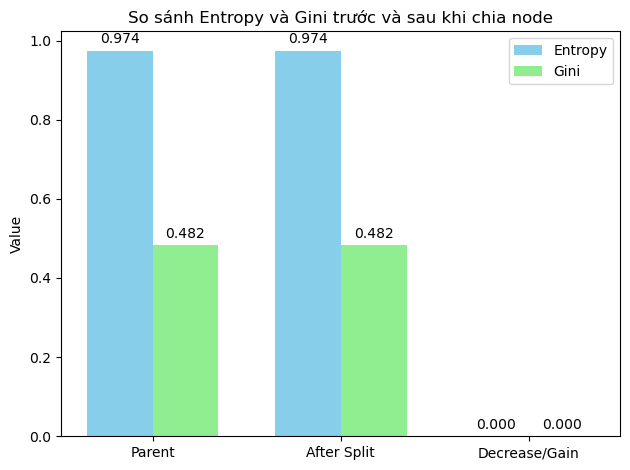

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Các giá trị cần truyền từ đoạn code trước (ví dụ):
# Thay bằng giá trị thực tế nếu cần test nhanh
# parent_entropy = 0.96
# weighted_entropy = 0.80
# info_gain = 0.16
# parent_gini = 0.48
# weighted_gini = 0.42
# gini_decrease = 0.06

# Gắn lại giá trị bạn đã tính
labels = ["Parent", "After Split", "Decrease/Gain"]

entropy_values = [parent_entropy, weighted_entropy, info_gain]
gini_values = [parent_gini, weighted_gini, gini_decrease]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, entropy_values, width, label='Entropy', color='skyblue')
bars2 = ax.bar(x + width/2, gini_values, width, label='Gini', color='lightgreen')

ax.set_ylabel('Value')
ax.set_title('So sánh Entropy và Gini trước và sau khi chia node')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


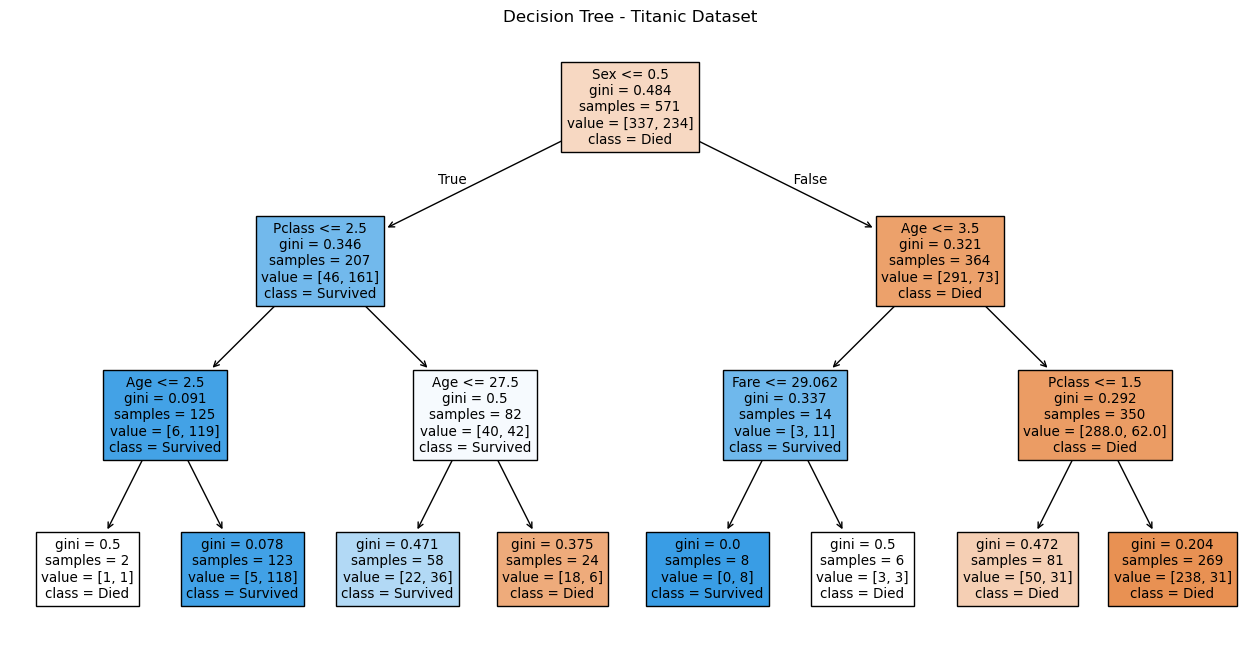

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Đọc dữ liệu Titanic
df = pd.read_csv("train.csv")

# Chọn các cột liên quan và xử lý dữ liệu
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df.dropna(inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Tạo X (feature) và y (label)
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# Tách dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình cây quyết định
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Vẽ cây
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.title("Decision Tree - Titanic Dataset")
plt.show()
